SSE for each number of clusters:
k=1: SSE=34.0000
k=2: SSE=12.9961
k=3: SSE=2.4049
k=4: SSE=1.3649
k=5: SSE=1.0811
k=6: SSE=0.8395
k=7: SSE=0.5847
k=8: SSE=0.4340
k=9: SSE=0.3056
k=10: SSE=0.2310


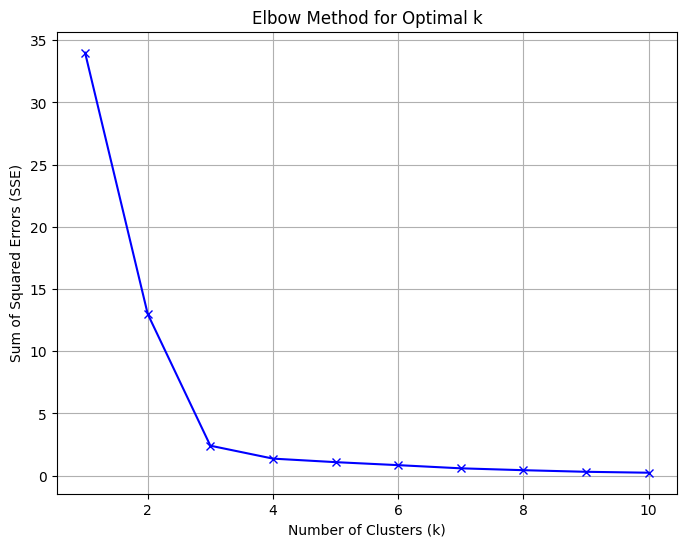


KMeans Clustering Results:
Optimal number of clusters: 3




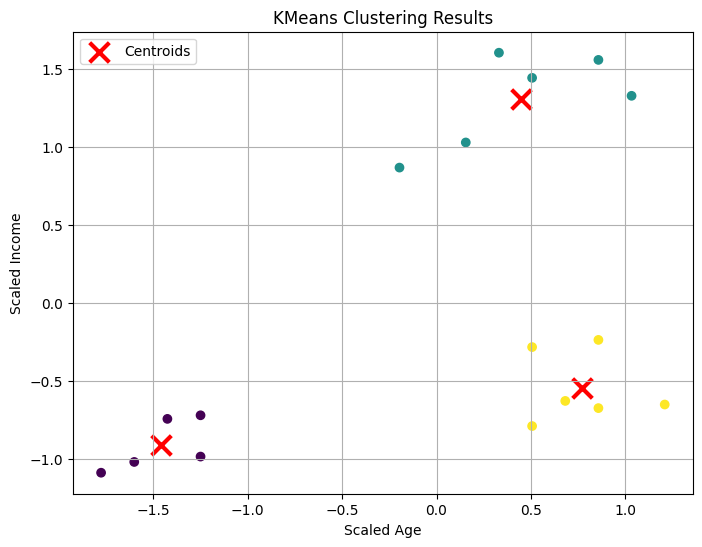

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

# Load data from provided document
data = {
    'Name': ['Rob', 'Michael', 'Mohan', 'Ismail', 'Kory', 'Gautam', 'David', 'Andrea', 'Brad', 'Angelina',
             'Donald', 'Tom', 'Arnold', 'Jared', 'Stark', 'Ranbir', 'Dipika', 'Priyanka', 'Nick', 'Alia',
             'Sid', 'Abdul'],
    'Age': [27, 29, 29, 28, 42, 39, 41, 38, 36, 35, 37, 26, 27, 28, 29, 32, 40, 41, 43, 39, 41, 39],
    'Income($)': [70000, 90000, 61000, 60000, 150000, 155000, 160000, 162000, 156000, 130000, 137000,
                  45000, 48000, 51000, 49500, 53000, 65000, 63000, 64000, 80000, 82000, 58000]
}
df = pd.DataFrame(data)
X = df[['Age', 'Income($)']].values

# Split data
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Calculate SSE for different k values
sse = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)
    sse.append(kmeans.inertia_)

# Print SSE values
print("SSE for each number of clusters:")
for k, s in zip(K, sse):
    print(f"k={k}: SSE={s:.4f}")

# Plot SSE vs number of clusters
plt.figure(figsize=(8, 6))
plt.plot(K, sse, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# Fit KMeans with optimal k (assuming k=3 from elbow method)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_train_scaled)

# Predict clusters
train_labels = kmeans.predict(X_train_scaled)
test_labels = kmeans.predict(X_test_scaled)

# Calculate silhouette score (as a proxy for clustering quality)
train_score = silhouette_score(X_train_scaled, train_labels)
test_score = silhouette_score(X_test_scaled, test_labels)

# Print results
print("\nKMeans Clustering Results:")
print(f"Optimal number of clusters: {optimal_k}")
print("\n")
# print(f"Training Silhouette Score: {train_score:.4f}")
# print(f"Testing Silhouette Score: {test_score:.4f}")

# Scatter plot of clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=train_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           c='red', marker='x', s=200, linewidths=3, label='Centroids')
plt.xlabel('Scaled Age')
plt.ylabel('Scaled Income')
plt.title('KMeans Clustering Results')
plt.legend()
plt.grid(True)
plt.show()

SSE for each number of clusters:
k=1: SSE=300.0000
k=2: SSE=54.1458
k=3: SSE=18.0470
k=4: SSE=12.5204
k=5: SSE=10.1420
k=6: SSE=7.3089
k=7: SSE=6.1862
k=8: SSE=5.1589
k=9: SSE=4.4149
k=10: SSE=3.8966


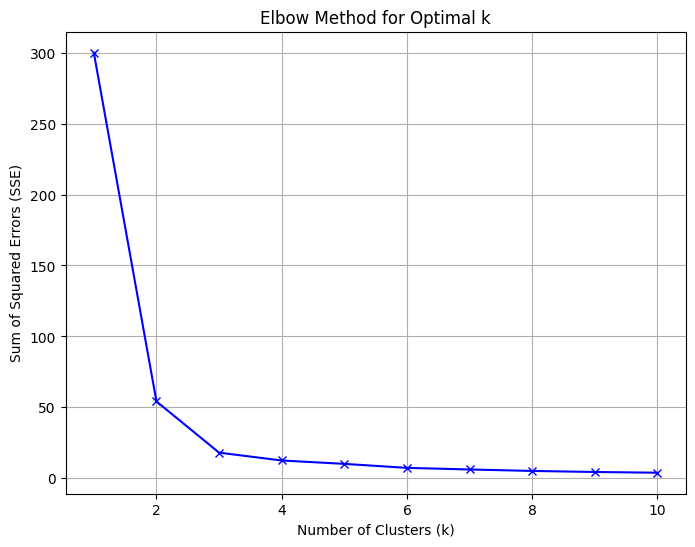


Optimal number of clusters (k) based on elbow method: 3


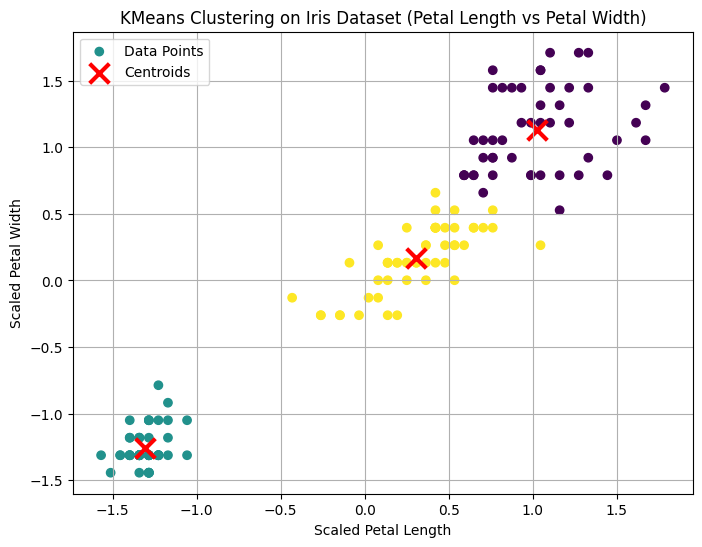

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset from the provided document
data = pd.read_csv('iris (1)(1).csv')

# Use only petal length and petal width, drop other features
X = data[['petal_length', 'petal_width']].values

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate SSE for different k values to create the elbow plot
sse = []
K = range(1, 11)  # We will test k values from 1 to 10
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)  # The inertia_ attribute gives us the SSE

# Print SSE values for each k
print("SSE for each number of clusters:")
for k, s in zip(K, sse):
    print(f"k={k}: SSE={s:.4f}")

# Plot SSE vs number of clusters (Elbow Plot)
plt.figure(figsize=(8, 6))
plt.plot(K, sse, 'bx-', markerfacecolor='red')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()  # This will display the plot in your environment

# Determine the optimal k (from the elbow plot, typically where the curve bends)
# Visually, the elbow appears around k=3 (since Iris has 3 species)
optimal_k = 3

# Fit KMeans with the optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)

# Get cluster labels
labels = kmeans.labels_

# Print the optimal k
print(f"\nOptimal number of clusters (k) based on elbow method: {optimal_k}")

# Scatter plot of clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', label='Data Points')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', marker='x', s=200, linewidths=3, label='Centroids')
plt.xlabel('Scaled Petal Length')
plt.ylabel('Scaled Petal Width')
plt.title('KMeans Clustering on Iris Dataset (Petal Length vs Petal Width)')
plt.legend()
plt.grid(True)
plt.show()  # Display the final scatter plot of clusters
